In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
from geopy.geocoders import Nominatim, Photon
from geopy.point import Point
from tqdm import tqdm
from math import isnan

In [2]:
usa = gpd.read_file('geo_export_0d2a9f05-6b38-468d-adf3-1de1eb3fad53.shp')

In [3]:
usa.head()

,drawseq,state_abbr,state_fips,state_name,sub_region,geometry
0,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,NaN,WA,53,Washington,Pacific,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,NaN,MT,30,Montana,Mountain,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,NaN,ME,23,Maine,New England,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,NaN,ND,38,North Dakota,West North Central,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot: >

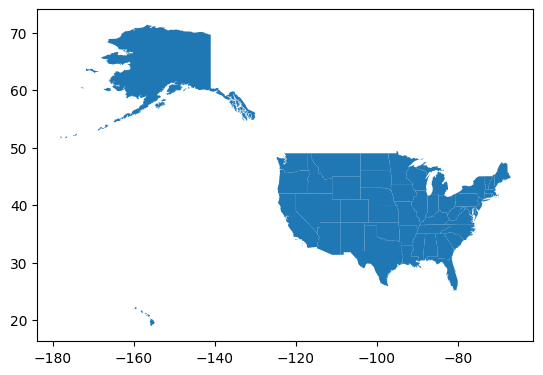

In [4]:
usa.plot()

In [5]:
df = pd.read_csv('../finalData/joined_df.csv')

In [6]:
misinfo = df[df['Misinfo_Or_Books']=='misinfo']

In [10]:
geolocator = Nominatim(user_agent="book-lookup")

In [11]:
misinfo

,Unnamed: 0,lat,lon,Location Name,Title,Misinfo_Or_Books
37558,37558,52.267135,-1.467522,Warwickshire,civilWar,misinfo
37559,37559,27.767601,-82.640291,St. Petersburg,civilWar,misinfo
37560,37560,14.032334,38.316572,Tigray,civilWar,misinfo
37561,37561,51.507218,-0.127586,London,civilWar,misinfo
37562,37562,40.678178,-73.944158,Brooklyn,civilWar,misinfo
...,...,...,...,...,...,...
74251,74251,35.912289,-79.058769,Might As Well Bar & Grill,ballotHarvesting,misinfo
74252,74252,38.627003,-90.199404,St. Louis,ballotHarvesting,misinfo
74253,74253,39.051027,-77.488683,USA Insurance Brokerage,ballotHarvesting,misinfo
74254,74254,39.051027,-77.488683,USA Insurance Brokerage,ballotHarvesting,misinfo


In [32]:
#US continent (-124.848974, 24.396308) - (-66.885444, 49.384358)
us_misinfo = misinfo.loc[(misinfo['lon'] >= -124.848974) & (misinfo['lon'] <= -66.885444) & (misinfo['lat'] <= 49.384358) & (misinfo['lat'] >= 24.396308)]

In [75]:
us_misinfo_10 = us_misinfo.head(10)

In [76]:
def reverse_geocoding(lat, lon):
    try:
        loc = geolocator.reverse((lat, lon))
        return (loc.raw["address"]["county"], loc.raw["address"]["state"], loc.raw["address"]["country"])
    except:
        return (None, None, None)

In [67]:
from geopy.extra.rate_limiter import RateLimiter
reverse_geocoding = RateLimiter(reverse_geocoding, min_delay_seconds=1)

In [77]:
us_misinfo_10['county'], us_misinfo_10['state'], us_misinfo_10['country'] = \
    np.vectorize(reverse_geocoding)(us_misinfo_10 ['lat'], us_misinfo_10 ['lon'])

<ipython-input-77-94e3b5d139d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_misinfo_10['county'], us_misinfo_10['state'], us_misinfo_10['country'] = \
<ipython-input-77-94e3b5d139d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_misinfo_10['county'], us_misinfo_10['state'], us_misinfo_10['country'] = \
<ipython-input-77-94e3b5d139d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [78]:
us_misinfo_10

,Unnamed: 0,lat,lon,Location Name,Title,Misinfo_Or_Books,county,state,country
37559,37559,27.767601,-82.640291,St. Petersburg,civilWar,misinfo,Pinellas County,Florida,United States
37562,37562,40.678178,-73.944158,Brooklyn,civilWar,misinfo,None,None,None
37563,37563,40.712775,-74.005973,New York,civilWar,misinfo,New York County,New York,United States
37565,37565,37.090240,-95.712891,United States,civilWar,misinfo,Montgomery County,Kansas,United States
37567,37567,46.729553,-94.685900,Minnesota,civilWar,misinfo,Cass County,Minnesota,United States
37569,37569,39.768403,-86.158068,Indianapolis,civilWar,misinfo,Marion,Indiana,United States
37570,37570,32.963966,-96.851309,Country Square Dr,civilWar,misinfo,Dallas County,Texas,United States
37571,37571,42.208108,-79.470246,Chautauqua Institution,civilWar,misinfo,Chautauqua County,New York,United States
37575,37575,28.161405,-81.601742,Davenport,civilWar,misinfo,Polk County,Florida,United States
37576,37576,37.964253,-91.831833,Missouri,civilWar,misinfo,Phelps County,Missouri,United States


In [80]:
party_data = pd.read_csv('president_county_candidate.csv')

In [81]:
party_data

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [93]:
party_data[party_data["county"] == "Marion"]

,state,county,candidate,party,total_votes,won
10039,Massachusetts,Marion,Joe Biden,DEM,2369,True
10040,Massachusetts,Marion,Donald Trump,REP,1244,False
10041,Massachusetts,Marion,Jo Jorgensen,LIB,52,False
10042,Massachusetts,Marion,Write-ins,WRI,20,False
10043,Massachusetts,Marion,Howie Hawkins,GRN,11,False


In [90]:
county_winners = party_data[["state", "county", "party", "won"]].set_index(["state", "county"])
county_winners = county_winners[county_winners["won"]]

In [94]:
county_winners.head()

party   won
state                county                          
Delaware             Kent County            DEM  True
                     New Castle County      DEM  True
                     Sussex County          REP  True
District of Columbia District of Columbia   DEM  True
                     Ward 2                 DEM  True

In [92]:
us_misinfo_10.join(county_winners[["party"]], on=["state", "county"])

,Unnamed: 0,lat,lon,Location Name,Title,Misinfo_Or_Books,county,state,country,party
37559,37559,27.767601,-82.640291,St. Petersburg,civilWar,misinfo,Pinellas County,Florida,United States,DEM
37562,37562,40.678178,-73.944158,Brooklyn,civilWar,misinfo,None,None,None,NaN
37563,37563,40.712775,-74.005973,New York,civilWar,misinfo,New York County,New York,United States,DEM
37565,37565,37.090240,-95.712891,United States,civilWar,misinfo,Montgomery County,Kansas,United States,REP
37567,37567,46.729553,-94.685900,Minnesota,civilWar,misinfo,Cass County,Minnesota,United States,REP
37569,37569,39.768403,-86.158068,Indianapolis,civilWar,misinfo,Marion,Indiana,United States,NaN
37570,37570,32.963966,-96.851309,Country Square Dr,civilWar,misinfo,Dallas County,Texas,United States,DEM
37571,37571,42.208108,-79.470246,Chautauqua Institution,civilWar,misinfo,Chautauqua County,New York,United States,REP
37575,37575,28.161405,-81.601742,Davenport,civilWar,misinfo,Polk County,Florida,United States,REP
37576,37576,37.964253,-91.831833,Missouri,civilWar,misinfo,Phelps County,Missouri,United States,REP


In [22]:
reverse_geocoding(52.267135,-1.467522).raw

{'place_id': 217278280,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 512135518,
 'lat': '52.2689934',
 'lon': '-1.4695938150382757',
 'display_name': 'Warwickshire Events Centre, A425, Radford Semele, Warwick, Warwickshire, England, CV31 1XG, United Kingdom',
 'address': {'amenity': 'Warwickshire Events Centre',
  'road': 'A425',
  'village': 'Radford Semele',
  'town': 'Warwick',
  'county': 'Warwickshire',
  'ISO3166-2-lvl6': 'GB-WAR',
  'state': 'England',
  'ISO3166-2-lvl4': 'GB-ENG',
  'postcode': 'CV31 1XG',
  'country': 'United Kingdom',
  'country_code': 'gb'},
 'boundingbox': ['52.2664131', '52.2714805', '-1.472058', '-1.4661764']}

In [43]:
location.raw["properties"]["country"][""]

{'geometry': {'coordinates': [-73.9441687, 40.6780117], 'type': 'Point'},
 'type': 'Feature',
 'properties': {'osm_id': 475559035,
  'extent': [-73.9441929, 40.6780809, -73.9441631, 40.6777155],
  'country': 'United States',
  'city': 'New York',
  'countrycode': 'US',
  'postcode': '11203',
  'locality': 'Bedford-Stuyvesant',
  'type': 'street',
  'osm_type': 'W',
  'osm_key': 'highway',
  'district': 'Brooklyn',
  'osm_value': 'residential',
  'name': 'Brooklyn Avenue',
  'state': 'New York'}}

In [18]:
for index, row in misinfo.iterrows():
    location = geolocator.reverse(str(misinfo.iloc[4].lat)+","+str(misinfo.iloc[4].lon))
    address = location.raw['address']
    country = address.get('country', '')

52.2671353 -1.4675216
